# Predicting Apartment Prices with Neighborhood

In this project, we are going to build a model that will predict the prices of apartments in the neighborhoods (city/towns) within Distrito Federal, a state in Mexico city. We are also going to encode categorical data to train a linear model and solve the problem of overfitting using regularization.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from category_encoders import OneHotEncoder # Used to encode categoricat data
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.utils.validation import check_is_fitted

## Prepare Data

### Import

In [2]:
df = pd.read_csv("data/mexico-city-real-estate-clean.csv")
df.head()

,price_aprox_usd,surface_covered_in_m2,lat,lon,borough
0,289775.66,54.0,23.634501,-102.552788,Miguel Hidalgo
1,48822.82,100.0,19.279771,-99.234597,Tlalpan
2,232663.51,87.0,19.432657,-99.177444,Miguel Hidalgo
3,166001.78,100.0,19.367025,-99.170349,Benito Juárez
4,94022.66,57.0,23.634501,-102.552788,Benito Juárez


### Explore

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9330 entries, 0 to 9329
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   price_aprox_usd        9330 non-null   float64
 1   surface_covered_in_m2  9330 non-null   float64
 2   lat                    8716 non-null   float64
 3   lon                    8716 non-null   float64
 4   borough                9330 non-null   object 
dtypes: float64(4), object(1)
memory usage: 364.6+ KB


In [4]:
df.shape

(9330, 5)

In [5]:
df.isnull().sum()

price_aprox_usd            0
surface_covered_in_m2      0
lat                      614
lon                      614
borough                    0
dtype: int64

In [6]:
df["borough"].value_counts().shape

(15,)

In [7]:
df["borough"].unique().shape

(15,)

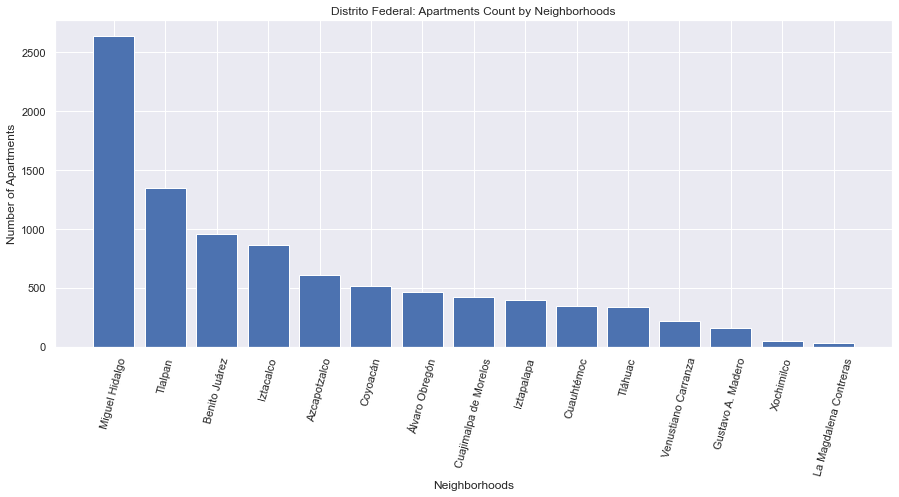

In [8]:
# Apartment Barchart

fig = plt.figure(figsize=(15, 6))
plt.bar(
    df["borough"].unique(),
    df["borough"].value_counts()
)

plt.xlabel("Neighborhoods")
plt.ylabel("Number of Apartments")
plt.title("Distrito Federal: Apartments Count by Neighborhoods")
plt.xticks(rotation = 75)

plt.savefig("images/4-1.png", dpi=150)

 ### Split

In [9]:
features = ["borough"]
target = "price_aprox_usd"

X_train = df[features]
y_train = df[target]

In [10]:
X_train.head()

,borough
0,Miguel Hidalgo
1,Tlalpan
2,Miguel Hidalgo
3,Benito Juárez
4,Benito Juárez


In [11]:
y_train.head()

0    289775.66
1     48822.82
2    232663.51
3    166001.78
4     94022.66
Name: price_aprox_usd, dtype: float64

## Build Model

In [12]:
y_mean = round(y_train.mean(), 2)
y_mean

102312.1

Create a list of prediction baseline

In [13]:
y_pred_baseline = [y_mean] * len(y_train)
y_pred_baseline[:5]

[102312.1, 102312.1, 102312.1, 102312.1, 102312.1]

### Baseline Mean Absolute Error

In [14]:
baseline_mae = mean_absolute_error(y_train, y_pred_baseline)

print(f"Baseline Mean Absolute Error: {round(baseline_mae, 2)}")
print(f"Mean Apartment Price: {y_mean}")

Baseline Mean Absolute Error: 57569.99
Mean Apartment Price: 102312.1


### Iterate

Since the values of the `feature` are strings, we will encode them to be represented numerically. We will use the `OneHotEncoder` library.

Instantiate `OneHotEncoder`

In [15]:
code = OneHotEncoder(use_cat_names=True)

Fit the transformer to the feature matrix `X_train`

In [16]:
code.fit(X_train)

OneHotEncoder(cols=['borough'], use_cat_names=True)

Use the encoder to transform the feature matrix `X_train`

In [17]:
X_train_coded = code.transform(X_train)

In [18]:
X_train_coded.shape

(9330, 15)

In [19]:
X_train_coded.head()

,borough_Miguel Hidalgo,borough_Tlalpan,borough_Benito Juárez,borough_Iztacalco,borough_Azcapotzalco,borough_Coyoacán,borough_Álvaro Obregón,borough_Cuajimalpa de Morelos,borough_Iztapalapa,borough_Cuauhtémoc,borough_Tláhuac,borough_Venustiano Carranza,borough_Gustavo A. Madero,borough_Xochimilco,borough_La Magdalena Contreras
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


### Create Pipeline

Create a pipeline that contains `OneHotEncoder` transformer and `LinearRegression` predictor.

In [20]:
model = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    LinearRegression()
)

model.fit(X_train, y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['borough'], use_cat_names=True)),
                ('linearregression', LinearRegression())])

### Evaluate model

Check the model performance on thetraining dataset `X_train`

In [21]:
training_pred = model.predict(X_train).round(2)
training_pred[:5]

array([120704.,  89344., 120704., 131712., 131712.])

Training `mean_absolute_error`

In [22]:
training_mae = mean_absolute_error(y_train, training_pred)

print(f"Mean Apartment Price: {y_mean}")
print(f"Baseline MAE: {round(baseline_mae, 2)}")
print(f"Training MAE: {round(training_mae, 2)}")

Mean Apartment Price: 102312.1
Baseline MAE: 57569.99
Training MAE: 49067.13


#### Test data

Chech the model performance on the test set.

In [23]:
X_test = pd.read_csv("test/mexico-city-real-estate-test-features.csv")[features]

In [24]:
y_test_pred = pd.Series(model.predict(X_test))

y_test_pred.head()

0     61952.0
1     84224.0
2     45568.0
3     61952.0
4    131712.0
dtype: float64

## Communicate Results

### Extract Coefficients

The dimesion is very high, since there are almost 15 unique values in the features column. There will be a problem of **"overfiting"**, the problem will be solved using regularization.

In [26]:
intercept = model.named_steps["linearregression"].intercept_
intercept

-1.021004886692826e+18

In [27]:
coefficients = model.named_steps["linearregression"].coef_
print("Coefficient len: ", len(coefficients))
print(coefficients)

Coefficient len:  15
[1.02100489e+18 1.02100489e+18 1.02100489e+18 1.02100489e+18
 1.02100489e+18 1.02100489e+18 1.02100489e+18 1.02100489e+18
 1.02100489e+18 1.02100489e+18 1.02100489e+18 1.02100489e+18
 1.02100489e+18 1.02100489e+18 1.02100489e+18]


### Extract feature names of encoded data

To know which feature each coefficient belongs to, we have to extract the feature names of encoded data from the `OneHotEncoder` in the model.

In [28]:
feature_names = model.named_steps["onehotencoder"].get_feature_names_out()

print("Features len: ", len(feature_names))
print(feature_names)

Features len:  15
['borough_Miguel Hidalgo' 'borough_Tlalpan' 'borough_Benito Juárez'
 'borough_Iztacalco' 'borough_Azcapotzalco' 'borough_Coyoacán'
 'borough_Álvaro Obregón' 'borough_Cuajimalpa de Morelos'
 'borough_Iztapalapa' 'borough_Cuauhtémoc' 'borough_Tláhuac'
 'borough_Venustiano Carranza' 'borough_Gustavo A. Madero'
 'borough_Xochimilco' 'borough_La Magdalena Contreras']


Create Feature Importance Series

In [29]:
feat_imp = pd.Series(coefficients, index=feature_names)

feat_imp.head()

borough_Miguel Hidalgo    1.021005e+18
borough_Tlalpan           1.021005e+18
borough_Benito Juárez     1.021005e+18
borough_Iztacalco         1.021005e+18
borough_Azcapotzalco      1.021005e+18
dtype: float64

#### Model Equation

Print the model equation using a `for` loop since it is goint to be a long equation.

In [30]:
print(f"price = {intercept.round(2)}")
for f,c in feat_imp.items():
    print(f"+ {round(c, 2)} * {f}")

price = -1.021004886692826e+18
+ 1.0210048866929467e+18 * borough_Miguel Hidalgo
+ 1.0210048866929153e+18 * borough_Tlalpan
+ 1.0210048866929577e+18 * borough_Benito Juárez
+ 1.0210048866928814e+18 * borough_Iztacalco
+ 1.0210048866928879e+18 * borough_Azcapotzalco
+ 1.0210048866929102e+18 * borough_Coyoacán
+ 1.021004886692935e+18 * borough_Álvaro Obregón
+ 1.021004886693021e+18 * borough_Cuajimalpa de Morelos
+ 1.0210048866928716e+18 * borough_Iztapalapa
+ 1.0210048866929327e+18 * borough_Cuauhtémoc
+ 1.02100488669287e+18 * borough_Tláhuac
+ 1.0210048866928833e+18 * borough_Venustiano Carranza
+ 1.0210048866928849e+18 * borough_Gustavo A. Madero
+ 1.0210048866928824e+18 * borough_Xochimilco
+ 1.0210048866929138e+18 * borough_La Magdalena Contreras


### Curse of Dimensionality and `Ridge`

The linear model acts weird when there are many dimensions, this causes an overfit. **Regularization** is used to solve this problem.

A `Ridge Regression` is used to swap the `Linear Regression` model. Using `Ridge()` for high dimensional model will help solve the problem of overfitting.

In [32]:
model_ridge = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    Ridge()
)

model.fit(X_train, y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['borough'], use_cat_names=True)),
                ('ridge', Ridge())])

#### Model equation

In [33]:
intercept_ridge = model.named_steps["ridge"].intercept_
coefficients_ridge = model.named_steps["ridge"].coef_

print("Coefficient len: ", len(coefficients_ridge))
print(coefficients_ridge)

Coefficient len:  15
[ 33863.95298068   4726.27125275  45285.34162896 -32909.82796877
 -24283.45684186  -2694.12641641  20765.07666488 107898.32623653
 -42679.64044346  20279.493148   -42379.11955422 -29851.61710908
 -28498.70761213 -30164.65109762    642.68513197]


In [34]:
feat_imp_ridge = pd.Series(coefficients_ridge, index=feature_names)

feat_imp_ridge.head()

borough_Miguel Hidalgo    33863.952981
borough_Tlalpan            4726.271253
borough_Benito Juárez     45285.341629
borough_Iztacalco        -32909.827969
borough_Azcapotzalco     -24283.456842
dtype: float64

In [36]:
print(f"price = {intercept_ridge.round(2)}")
for f,c in feat_imp_ridge.items():
    print(f"+ {round(c, 2)} * {f}")

price = 86949.61
+ 33863.95 * borough_Miguel Hidalgo
+ 4726.27 * borough_Tlalpan
+ 45285.34 * borough_Benito Juárez
+ -32909.83 * borough_Iztacalco
+ -24283.46 * borough_Azcapotzalco
+ -2694.13 * borough_Coyoacán
+ 20765.08 * borough_Álvaro Obregón
+ 107898.33 * borough_Cuajimalpa de Morelos
+ -42679.64 * borough_Iztapalapa
+ 20279.49 * borough_Cuauhtémoc
+ -42379.12 * borough_Tláhuac
+ -29851.62 * borough_Venustiano Carranza
+ -28498.71 * borough_Gustavo A. Madero
+ -30164.65 * borough_Xochimilco
+ 642.69 * borough_La Magdalena Contreras


**Feature Importance Bar Chart**

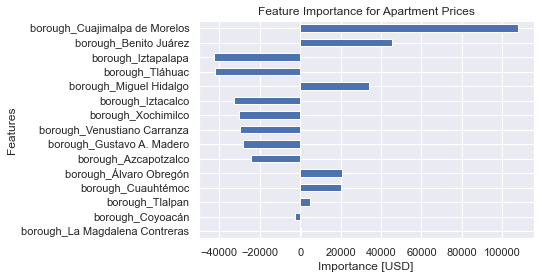

In [39]:
(
    feat_imp_ridge
    .sort_values(key=abs)
    .tail(15)
    .plot(kind ="barh")
)

plt.xlabel("Importance [USD]")
plt.ylabel("Features")

plt.title("Feature Importance for Apartment Prices")

plt.savefig("images/4-2.png", dpi=150)